In [1]:
import os
import tensorflow as tf

os.environ["CUDA_VISIBLE_DEVICES"] = "0" # Selecciona el índice de la GPU

physical_devices = tf.config.list_physical_devices('GPU')

tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [ ]:
"""from tensorboard import program

log_dir = "./home/vicevil/Documentos/graficas/logs"
tb=program.TensorBoard()
tb.configure(argv=[None, '--logdir', log_dir])
url = tb.launch() #  lanza TensorBoard en el navegador"""

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import os
#from scipy.sparse import hstack
#import funciones_ML as bt
from sklearn.feature_extraction.text import TfidfVectorizer, FeatureHasher
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder, Normalizer,MaxAbsScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,classification_report,r2_score,RocCurveDisplay,confusion_matrix, accuracy_score,recall_score,f1_score,precision_score,precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
#from imblearn.under_sampling import RandomUnderSampler

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint,ReduceLROnPlateau,CallbackList
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras import regularizers
from tensorflow.keras.losses import CategoricalCrossentropy, sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import ReduceLROnPlateau





# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Código para los tamaños de las fuentes y los "ticks" de los ejes:
plt.rc('font', size=6)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
import ray
import ray as rd
from ray.data import Dataset
from ray.train import xgboost
from ray.data.block import BlockAccessor
import warnings



In [6]:
ray.init()

@ray.remote
def my_function():
    return 1

# Llamada a la función remota.
result_id = my_function.remote()
result = ray.get(result_id) 
print(result)


2024-04-01 16:12:37,249	INFO worker.py:1743 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


1


APLICACION RED NEURONAL AL DATASET LIMPIO MENOS LAS 3 TRAS EL ESTUDIO DE CORRELACION

In [8]:
# Ruta al archivo CSV gigante
file_path_wsl = "/mnt/d/Cursos/REPOSITORIOS/DATASET/malware_total/original/df_one_hot_full_ml_mm.csv"
file_path_w11= "D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\df_one_hot_full_ml_mm.csv"

In [19]:
ds = ray.data.read_csv(file_path_w11)
ds.repartition(4)
repartitioned_ds.stats()


''

In [ ]:
repartitioned_ds.show(2)

In [ ]:
ds.show(8)

2024-04-01 16:14:57,142	INFO dataset.py:2368 -- Tip: Use `take_batch()` instead of `take() / show()` to return records in pandas or numpy batch format.
2024-04-01 16:14:57,152	INFO streaming_executor.py:115 -- Starting execution of Dataset. Full log is in C:\Users\victo\AppData\Local\Temp\ray\session_2024-04-01_16-12-34_041718_5112\logs/ray-data.log
2024-04-01 16:14:57,152	INFO streaming_executor.py:116 -- Execution plan of Dataset: InputDataBuffer[Input] -> TaskPoolMapOperator[ReadCSV] -> LimitOperator[limit=8]



- ReadCSV 1:   0%|          | 0/1 [00:00<?, ?it/s]

- limit=8 2:   0%|          | 0/1 [00:00<?, ?it/s]

Running 0:   0%|          | 0/1 [00:00<?, ?it/s]

{'': 0, '0': 0.0003509575, '1': 4.5435716e-08, '2': 0.0, '3': 0.0, '4': 0.36363637, '5': 0.65217394, '6': 0.0, 'proto_icmp': 0.0, 'proto_tcp': 1.0, 'proto_udp': 0.0, 'conn_state_OTH': 0.0, 'conn_state_REJ': 0.0, 'conn_state_RSTO': 0.0, 'conn_state_RSTOS0': 0.0, 'conn_state_RSTR': 0.0, 'conn_state_RSTRH': 0.0, 'conn_state_S0': 1.0, 'conn_state_S1': 0.0, 'conn_state_S2': 0.0, 'conn_state_S3': 0.0, 'conn_state_SF': 0.0, 'conn_state_SH': 0.0, 'conn_state_SHR': 0.0, 'history_Aa': 0.0, 'history_Ar': 0.0, 'history_C': 0.0, 'history_CCC': 0.0, 'history_CCCC': 0.0, 'history_D': 0.0, 'history_DAd': 0.0, 'history_DFafA': 0.0, 'history_DFr': 0.0, 'history_DT': 0.0, 'history_DTT': 0.0, 'history_D^': 0.0, 'history_D^d': 0.0, 'history_DaFfA': 0.0, 'history_Dd': 0.0, 'history_DdA': 0.0, 'history_DdAa': 0.0, 'history_DdAaFf': 0.0, 'history_DdAtaFf': 0.0, 'history_Dr': 0.0, 'history_DrF': 0.0, 'history_F': 0.0, 'history_Fa': 0.0, 'history_FaAr': 0.0, 'history_FaR': 0.0, 'history_FfA': 0.0, 'history_Ffa'

'Operator 1 ReadCSV: 1 tasks executed, 1 blocks produced in 2.62s\n* Remote wall time: 2.62s min, 2.62s max, 2.62s mean, 2.62s total\n* Remote cpu time: 1.91s min, 1.91s max, 1.91s mean, 1.91s total\n* UDF time: 0us min, 0us max, 0.0us mean, 0us total\n* Peak heap memory usage (MiB): 355.96 min, 355.96 max, 355 mean\n* Output num rows per block: 58358 min, 58358 max, 58358 mean, 58358 total\n* Output size bytes per block: 134456832 min, 134456832 max, 134456832 mean, 134456832 total\n* Output rows per task: 58358 min, 58358 max, 58358 mean, 1 tasks used\n* Tasks per node: 1 min, 1 max, 1 mean; 1 nodes used\n* Operator throughput:\n\t* Ray Data throughput: 22304.738654301655 rows/s\n\t* Estimated single node throughput: 22304.738654301655 rows/s\n\nOperator 2 limit=8: 1 tasks executed, 1 blocks produced in 2.62s\n* Remote wall time: 2.62s min, 2.62s max, 2.62s mean, 2.62s total\n* Remote cpu time: 1.91s min, 1.91s max, 1.91s mean, 1.91s total\n* UDF time: 0us min, 0us max, 0.0us mean, 0

In [11]:
# Imprimir resumen general
print(stats.summary())

# Imprimir estadísticas por columna
print(stats.column_stats())

# Visualizar la distribución de una columna
stats.plot_histogram("columna_numerica")

# Calcular la correlación entre dos columnas
stats.correlation("columna1", "columna2")

NameError: name 'stats' is not defined

In [10]:
def convertir_a_numpy(bloque):
    return BlockAccessor.for_block(bloque).to_numpy()

# Obtener bloques del dataset
bloques_numpy = dataset.map_blocks(convertir_a_numpy)

# Convertir bloques a una lista de matrices NumPy
data_numpy = list(bloques_numpy)



In [51]:
# Crear un objeto PCA
pca = PCA(n_components=2)

# Ajustar PCA a los datos
pca.fit(data_numpy)

# Obtener componentes principales y varianzas explicadas
componentes_principales = pca.components_
varianzas_explicadas = pca.explained_variance_

print("Componentes principales:\n", componentes_principales)
print("Varianzas explicadas:\n", varianzas_explicadas)

In [9]:


# Mostrar la varianza explicada por cada componente
plt.bar(range(1, pca.n_components_ + 1), varianzas_explicadas)
plt.xlabel("Componente Principal")
plt.ylabel("Varianza Explicada")
plt.show()

# Proyectar los datos en los dos primeros componentes
datos_proyectados = pca.transform(data_numpy)

# Visualizar los datos proyectados
plt.scatter(datos_proyectados[:, 0], datos_proyectados[:, 1])
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


In [11]:
#split
train_set, test_set = ds.random_split([0.8, 0.2])

AttributeError: 'Dataset' object has no attribute 'random_split'

In [ ]:
# Entrena el modelo XGBoost
model = xgboost.train(
    train_set,
    num_rounds=100,
    max_depth=5,
    learning_rate=0.1,
    tree_method="hist",
)

# Evalúa el modelo
predictions = model.predict(test_set)
accuracy = metrics.accuracy_score(test_set["label"], predictions)

# Realiza el split
splits = xgboost.split(train_set, n_splits=4)

# Entrena un modelo XGBoost en cada subconjunto
models = [xgboost.train(split, num_rounds=100) for split in splits]

# Combina las predicciones
combined_predictions = np.mean([model.predict(test_set) for model in models])

# Evalúa las predicciones combinadas
combined_accuracy = metrics.accuracy_score(test_set["label"], combined_predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Combined Accuracy: {combined_accuracy:.4f}")

In [62]:
df_ml

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,orig_pkts,resp_pkts,anyo,mes,hora,dia_semanal,target
0,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,S0,0.0,3.0,0.0,2018,5,15,2,0
1,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,S0,0.0,1.0,0.0,2018,5,15,2,0
2,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,S0,0.0,1.0,0.0,2018,5,15,2,0
3,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,S0,0.0,3.0,0.0,2018,5,15,2,0
4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,S0,0.0,1.0,0.0,2018,5,15,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,192.168.1.195,123.0,89.221.210.188,123.0,udp,SF,0.0,2.0,2.0,2019,9,0,5,1
25010999,192.168.1.195,37306.0,102.165.48.81,17769.0,tcp,S1,0.0,8952.0,9613.0,2019,9,1,4,0
25011000,192.168.1.195,123.0,212.111.30.190,123.0,udp,SF,0.0,2.0,2.0,2019,9,0,5,1
25011001,192.168.1.195,123.0,5.1.56.123,123.0,udp,SF,0.0,2.0,2.0,2019,9,0,5,1


In [8]:
#df["target"] = df["Target"].map(lambda x: 0 if x == "Malicious" else 1)

In [10]:
#df.drop(columns={"dia","resp_ip_bytes", "orig_ip_bytes","Target"}, inplace=True)

In [63]:
bt.obtener_estadisticas(df_ml)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
id.orig_h,0.09,object,No,192.168.1.196,No,No,No,No,No,categorica ordinal,0.0
id.orig_p,0.26,float64,39909.62,No,16091.97,258951549.59,32980.0,42993.0,52360.0,numerica continua,0.0
id.resp_h,46.6,object,No,162.248.88.215,No,No,No,No,No,categorica ordinal,0.0
id.resp_p,0.26,float64,9710.51,No,22174.48,491707739.75,23.0,23.0,81.0,numerica continua,0.0
proto,0.0,object,No,tcp,No,No,No,No,No,categorica ordinal,0.0
conn_state,0.0,object,No,S0,No,No,No,No,No,categorica ordinal,0.0
missed_bytes,0.0,float64,76.33,No,381679.91,145679555881.059998,0.0,0.0,0.0,numerica continua,0.0
orig_pkts,0.0,float64,13.5,No,17511.7,306659531.76,1.0,1.0,3.0,numerica continua,0.0
resp_pkts,0.0,float64,0.01,No,4.19,17.55,0.0,0.0,0.0,numerica continua,0.0
anyo,0.0,int64,2018.28,No,0.45,0.2,2018.0,2018.0,2019.0,numerica discreta,0.0


In [61]:
df_ml.shape

(25011003, 14)

APLICACION RED NEURONAL

In [21]:
df_round.to_csv("D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\df_malware_unido_label_minmax_neuronal_w11.csv", index=False)

In [4]:
df_round=pd.read_csv(r"/home/vicevil/Documentos/df_malware_unido_lb_mm_round_neuronal.csv")

In [5]:
df_round.drop(columns={"Unnamed: 0"}, inplace=True)

In [27]:
df_round

,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1
25010999,0,0,1,0,0,0,1,0,1,0,1,1,1,0,1
25011000,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1
25011001,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1


In [28]:
df_round.shape

(25011003, 15)

In [35]:
X=df_round.iloc[:,1:15]
y=df_round["target"]

In [37]:
X_train, X_test, y_train,y_test=train_test_split(X, y, test_size=0.1, random_state=42)

Convierto todo en Arrays

In [38]:
X_train_a=X_train.values
X_test_a = X_test.values
y_train_a=y_train.values
y_test_a=y_test.values

In [39]:
X_train_a.shape

(22509902, 14)

In [11]:
# Definir el directorio de registro para TensorBoard(ensorBoard es una herramienta esencial para entender, depurar y optimizar los modelos de TensorFlow.)
#log_dir = r"/home/vicevil/Documentos/graficas/logs"

1. MODELO NEURONAL SECUANCIAL
    - el modelo se compone de 4 capas bidimensionales de entrada junto a 4 capas densas en sentido decreciente y alternando activaciones relu y elu, que impiden la muerte neuronal. Despues de la concatenacion de las capas, el modelo continua con 4 capas densas con la mismas caracteristicas que las anteriores, a excepcion de la capa de entrada, que llega un regularizador l2 para controlar el sobreajuste y detras de cada capa densa hay una capa batchnormalization que mejora la tasa de aprendizaje, evitando el sobreajuste y ayudando a la regularizacion, fiinalizando con unca capa de salida de 2 unidades yu activacion sotfmax para clasificacion.
    Al modelo le acompaña un early_stopping, para evitar el sobreajuste si se repite 5 veces el mismo valor y un reduce_lr, el cual reduce la tasa de aprendizaje cuando el conjunto de validacion no mejora

In [40]:
import os
#habilita la aceleracion por hardware de mi grafica
os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla=true"

In [49]:
from tensorboard import program

log_dir = r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\logs"
tb=program.TensorBoard()
tb.configure(argv=[None, '--logdir', log_dir])
url = tb.launch() #  lanza TensorBoard en el navegador

In [50]:
%load_ext tensorboard

In [53]:
modelo = tf.keras.Sequential()
# Definir las 4 entradas
 
modelo.add(tf.keras.layers.Dense(units=512, activation='relu', input_shape=(14,), kernel_regularizer=l2(0.01)))
modelo.add(tf.keras.layers.BatchNormalization())#mejora la tasa de parendizaje, evitando sobreajuste, ya que tb regulariza la funcion

# Capas ocultas
modelo.add(tf.keras.layers.Dense(units=512, activation="relu", input_dim=14))
modelo.add(tf.keras.layers.BatchNormalization())

modelo.add(Dropout(0.2))

modelo.add(tf.keras.layers.Dense(units=512, activation="elu"))
modelo.add(tf.keras.layers.BatchNormalization())

modelo.add(tf.keras.layers.Dense(units=512, activation='elu'))
modelo.add(tf.keras.layers.BatchNormalization())

# Capa de salida
modelo.add(tf.keras.layers.Dense(units=2, activation='softmax'))  # Se cambia a 2 unidades para representar las dos clases
#optimizador
"""optimizador= tf.keras.optimizers.SGD(learning_rate=0.005,
                                      momentum=0.9, #aporta inercia al proceso de optimizacion, acelerando la convergencia
                                      nesterov=True)# en True actualiza momentum demanera anticipada al gradiente, mejorando la estaboiilidad"""

optimizador=Adam( learning_rate=0.01, # rebajo el learning rate por ser mas adecuado para un ajuste fino aunque tarde mas
                    beta_1=0.6, # influye en el gradiente pasado (1 mas al gradiente y 0 nada)
                    beta_2=0.4, #influye en los cuadrados de los gradientes pasados(1 mas a la varianza y 0 nada)
                    epsilon=1e-09, #es para prevenior divisiones entre 0
                    amsgrad=False)#es una variante de Adam y ayuda con la convergencia de ambos a evitar oscilaciones de los pesos durante la optimizacion"""
"""optimizador = tf.keras.optimizers.Ftrl(
    l1_regularization_strength=0.0001,#penaliza los pesos con lasso
    l2_regularization_strength=0.000001,#penaliza con ridge, consiguiendo con ambos un proceso de actualziacion de pesosmejorado, evitando sobreajuste
    learning_rate_power=-0.5,#contola la rapidez de la tasa de aprendizaje con la que decae con el tiempo, indiviualemnte a cada parametro
    initial_accumulator_value=0.1,#valor inicial de acumulacion de gradientes
)"""

# Compilar el modelo
modelo.compile(optimizer=optimizador, loss=sparse_categorical_crossentropy, metrics=['accuracy'])

#detniene el entrenamiento si la metrica no mejora 
early_stopping_callbacks = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

#reduce la tasa de aprendizaje cuando el rendimiento del conj. val no mejora
reduce_lr_callbacks = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1)

#Guarda el modelo cuando mejora la métrica de validación
filepath = r'D:\Cursos\REPOSITORIOS\DATASET\malware_total\logs\modelo.h5'
monitor = 'val_loss'
checkpoint_callbacks = ModelCheckpoint(filepath=filepath, monitor=monitor, verbose=1, save_best_only=True)

#visionado_tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)


callbacks_list = [reduce_lr_callbacks, early_stopping_callbacks, checkpoint_callbacks]

# Entrenar el modelo
historia = modelo.fit(X_train_a, y_train_a, batch_size=256, epochs=20,verbose=1,validation_split=0.1,callbacks=callbacks_list)

Epoch 1/20
79134/79137 [============================>.] - ETA: 0s - loss: 0.1033 - accuracy: 0.9484
Epoch 1: val_loss improved from inf to 42.96127, saving model to D:\Cursos\REPOSITORIOS\DATASET\malware_total\logs\modelo.h5
79137/79137 [==============================] - 604s 8ms/step - loss: 0.1033 - accuracy: 0.9484 - val_loss: 42.9613 - val_accuracy: 0.6006 - lr: 0.0100
Epoch 2/20
79135/79137 [============================>.] - ETA: 0s - loss: 0.1006 - accuracy: 0.9491
Epoch 2: val_loss did not improve from 42.96127
79137/79137 [==============================] - 556s 7ms/step - loss: 0.1006 - accuracy: 0.9491 - val_loss: 1870.8248 - val_accuracy: 0.4613 - lr: 0.0100
Epoch 3/20
79137/79137 [==============================] - ETA: 0s - loss: 0.1005 - accuracy: 0.9494
Epoch 3: val_loss improved from 42.96127 to 5.59415, saving model to D:\Cursos\REPOSITORIOS\DATASET\malware_total\logs\modelo.h5
79137/79137 [==============================] - 571s 7ms/step - loss: 0.1005 - accuracy: 0.9494

KeyboardInterrupt: 

In [45]:

modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               7680      
                                                                 
 batch_normalization_12 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_16 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization_13 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 512)              

In [46]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = modelo.evaluate(X_test_a, y_test_a)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Predicción
y_pred = modelo.predict(X_test_a)
y_pred_classes = np.argmax(y_pred, axis=1)

# Métricas de clasificación
print(classification_report(y_test, y_pred_classes))

78160/78160 [==============================] - 352s 4ms/step - loss: 0.0892 - accuracy: 0.9541
Loss: 0.08919236809015274
Accuracy: 0.9540961980819702
78160/78160 [==============================] - 218s 3ms/step


c:\Users\victo\miniconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\miniconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.65      1.00      0.79   1622554
           1       0.00      0.00      0.00    878547

    accuracy                           0.65   2501101
   macro avg       0.32      0.50      0.39   2501101
weighted avg       0.42      0.65      0.51   2501101



c:\Users\victo\miniconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


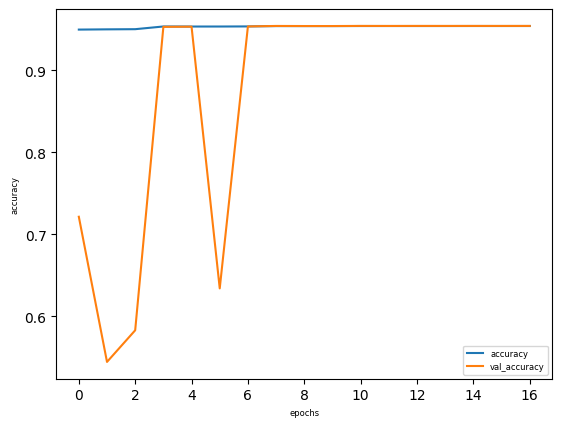

In [47]:
df_history = pd.DataFrame(historia.history)
df_history[["accuracy","val_accuracy"]].plot();
plt.xlabel("epochs")
plt.ylabel("accuracy");

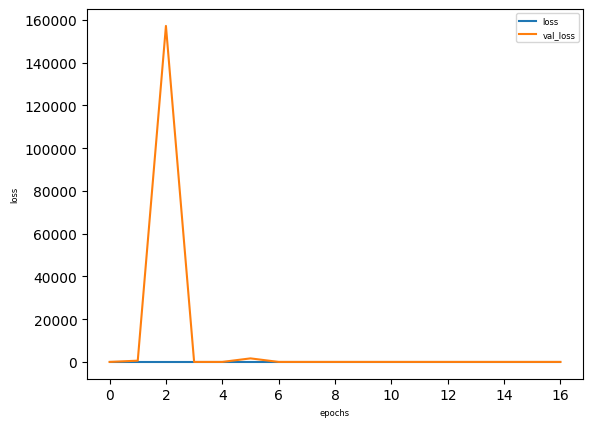

In [48]:
df_history = pd.DataFrame(historia.history)
df_history[["loss","val_loss"]].plot();
plt.xlabel("epochs")
plt.ylabel("loss");